# Numerical Missing Value Imputation By Class

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Dataset 
df = pd.read_csv(r'C:\Users\lenovo\Downloads\test.csv')

In [4]:
df.shape

(1459, 80)

In [6]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
missing_value_clm_gre_20 = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
df2_drop_clm = df.drop(columns=missing_value_clm_gre_20)
df2_drop_clm.shape

(1459, 75)

In [9]:
df3_num=df2_drop_clm.select_dtypes(include=['int64','float64'])
df3_num.shape

(1459, 37)

In [10]:
df3_num.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [11]:
num_var_miss = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
df3_num[num_var_miss][df3_num[num_var_miss].isnull().any(axis=1)]

,LotFrontage,MasVnrArea,GarageYrBlt
6,NaN,0.0,1992.0
40,NaN,1159.0,2000.0
41,NaN,0.0,2003.0
45,NaN,120.0,1967.0
47,NaN,0.0,1978.0
52,NaN,0.0,1964.0
53,98.0,144.0,NaN
59,NaN,150.0,1959.0
71,56.0,0.0,NaN
75,NaN,0.0,1962.0


In [12]:
df['LotConfig'].unique()

array(['Inside', 'Corner', 'FR2', 'CulDSac', 'FR3'], dtype=object)

In [13]:
df[df.loc[:,'LotConfig'] == "Inside"]["LotFrontage"].replace(np.nan,df[df.loc[:,'LotConfig'] == "Inside"]["LotFrontage"].mean())

0        80.000000
2        74.000000
3        78.000000
4        43.000000
6        66.709746
7        63.000000
8        85.000000
11       21.000000
12       21.000000
15      102.000000
17       90.000000
18       79.000000
19      110.000000
21       41.000000
23       43.000000
24       67.000000
25       63.000000
27       73.000000
28       92.000000
30       70.000000
33       85.000000
34       88.000000
36       39.000000
37       30.000000
38       24.000000
39       24.000000
42       57.000000
43       68.000000
44       80.000000
45       66.709746
46       80.000000
47       66.709746
48       80.000000
49       80.000000
51       88.000000
52       66.709746
53       98.000000
54       68.000000
56       75.000000
58       70.000000
59       66.709746
60       87.000000
61       80.000000
62       60.000000
63       60.000000
65       70.000000
67       60.000000
69       80.000000
71       56.000000
72       69.000000
74       69.000000
75       66.709746
76       68.

In [14]:
df_copy = df.copy()
for var_class in df['LotConfig'].unique():
    df_copy.update(df[df.loc[:,'LotConfig'] == var_class]["LotFrontage"].replace(np.nan,df[df.loc[:,'LotConfig'] == var_class]["LotFrontage"].mean()))

In [15]:
df_copy.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage         0
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [16]:
df_copy = df.copy()
num_vars_miss = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
cat_vars = ['LotConfig','MasVnrType','GarageType']
for cat_var, num_var_miss in zip(cat_vars,num_vars_miss):
    for var_class in df[cat_var].unique():
        df_copy.update(df[df.loc[:,cat_var] == var_class][num_var_miss].replace(np.nan,df[df.loc[:,cat_var] == var_class][num_var_miss].mean()))

In [17]:
df_copy[num_vars_miss].isnull().sum()

LotFrontage     0
MasVnrArea     15
GarageYrBlt    76
dtype: int64

In [18]:
df_copy[df_copy[['MasVnrType']].isnull().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
231,1692,60,RL,81.373786,12891,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,651.0,Unf,0.0,219.0,870.0,GasA,Ex,Y,SBrkr,878,1126,0,2004,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2002.0,Fin,3.0,644.0,TA,TA,Y,0,48,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
246,1707,20,FV,90.000000,7993,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,NaN,NaN,NaN,0,10,2009,New,Partial
422,1883,60,RL,70.000000,8749,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,840.0,840.0,GasA,Ex,Y,SBrkr,840,885,0,1725,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2002.0,RFn,2.0,550.0,TA,TA,Y,0,48,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
532,1993,60,RL,66.709746,7750,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,707.0,707.0,GasA,Ex,Y,SBrkr,707,707,0,1414,0.0,0.0,2,1,3,1,Gd,6,Typ,1,Gd,Attchd,2002.0,Fin,2.0,403.0,TA,TA,Y,100,35,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
544,2005,20,RL,87.000000,10037,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,666.0,Unf,0.0,794.0,1460.0,GasA,Ex,Y,SBrkr,1460,0,0,1460,0.0,0.0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,Fin,2.0,480.0,TA,TA,Y,0,20,0,0,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal
581,2042,60,FV,66.709746,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,GasA,Ex,Y,SBrkr,952,860,0,1812,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,2002.0,RFn,2.0,469.0,TA,TA,Y,144,112,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
851,2312,60,RL,59.000000,15810,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,768.0,768.0,GasA,Ex,Y,SBrkr,768,728,0,1496,0.0,0.0,3,0,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,Unf,2.0,572.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,New,Partial
865,2326,80,RL,81.373786,11950,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,SLvl,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Ex,Y,SBrkr,754,640,0,1394,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,BuiltIn,2003.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,10,2007,WD,Normal
880,2341,20,RL,85.000000,9965,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Somerst,Feedr,Norm,1Fam,1Story,7,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1528.0,1528.0,GasA,Ex,Y,SBrkr,1528,0,0,1528,0.0,0.0,3,2,3,1,Gd,6,Typ,1,TA,Attchd,2007.0,Unf,2.0,480.0,TA,TA,Y,0,228,0,0,0,0,NaN,NaN,NaN,0,9,2007,New,Partial
889,2350,60,FV,112.000000,12217,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2

In [19]:
df_copy[df_copy[['GarageType']].isnull().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
53,1514,90,RL,98.000000,13260,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,6,1962,2001,Hip,CompShg,HdBoard,HdBoard,BrkFace,144.0,TA,TA,CBlock,TA,TA,No,BLQ,1500.0,Unf,0.0,228.0,1728.0,GasA,TA,Y,SBrkr,1728,0,0,1728,2.0,0.0,2,0,6,2,TA,10,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2010,Oth,Abnorml
71,1532,30,RM,56.000000,4485,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,7,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,BLQ,579.0,Unf,0.0,357.0,936.0,GasA,TA,Y,SBrkr,936,0,0,936,1.0,0.0,1,0,2,1,TA,5,Typ,1,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,P,51,0,135,0,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal
79,1540,190,RM,100.000000,9045,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,5,3,1910,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Fa,BrkTil,TA,TA,Mn,Unf,0.0,Unf,0.0,840.0,840.0,Grav,Fa,N,FuseF,1128,1128,0,2256,0.0,0.0,2,0,4,2,Fa,12,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,18,18,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Abnorml
92,1553,70,RM,60.000000,12900,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,6,8,1912,2009,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,TA,No,Unf,0.0,Unf,0.0,780.0,780.0,GasA,Ex,Y,SBrkr,780,780,0,1560,0.0,0.0,1,1,3,1,Gd,7,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,344,0,0,0,168,0,NaN,NaN,NaN,0,5,2010,WD,Normal
96,1557,190,RL,60.000000,9900,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,2fmCon,1.5Fin,5,4,1915,1950,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,Fa,Fa,BrkTil,TA,TA,No,Rec,1026.0,Unf,0.0,186.0,1212.0,GasA,TA,N,SBrkr,1212,180,0,1392,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,168,0,0,0,NaN,NaN,NaN,0,2,2010,ConLD,Normal
98,1559,70,C (all),66.709746,6449,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,2Story,4,1,1907,1950,Gambrel,CompShg,Wd Sdng,Stucco,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,73.0,Unf,0.0,634.0,707.0,GasW,TA,N,SBrkr,942,942,0,1884,0.0,0.0,1,1,4,1,TA,7,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,239,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Abnorml
100,1561,90,RL,72.000000,10773,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,3,1967,1967,Gable,Tar&Grv,Plywood,Plywood,BrkFace,72.0,Fa,Fa,CBlock,TA,TA,No,ALQ,704.0,Unf,0.0,1128.0,1832.0,GasA,TA,N,SBrkr,1832,0,0,1832,2.0,0.0,2,0,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,58,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
130,1591,20,RL,64.000000,6410,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1958,1958,Hip,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,960.0,960.0,GasA,Ex,Y,SBrkr,960,0,0,960,0.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal
133,1594,90,RH,60.000000,7200,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,Duplex,2Story,4,6,1967,1967,Flat,Tar&Grv,Plywood,CBlock,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,862,1788,0,2650,0.0,0.0,3,0,6,2,TA,10,Min2,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,2,2010,WD,Normal
134,1595,50,RL,51.000000,9839,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,5,2,1931,19

In [20]:
df_copy = df.copy()
num_vars_miss = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
cat_vars = ['LotConfig','Exterior2nd','KitchenQual']
for cat_var, num_var_miss in zip(cat_vars,num_vars_miss):
    for var_class in df[cat_var].unique():
        df_copy.update(df[df.loc[:,cat_var] == var_class][num_var_miss].replace(np.nan,df[df.loc[:,cat_var] == var_class][num_var_miss].mean()))

In [21]:
df_copy[num_vars_miss].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

# # Data Distribution

C:\Users\lenovo\AppData\Local\Temp\ipykernel_21016\14655888.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], bins=20, kde_kws={'linewidth':8, 'color':'red'}, label="Original",)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_21016\14655888.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dist

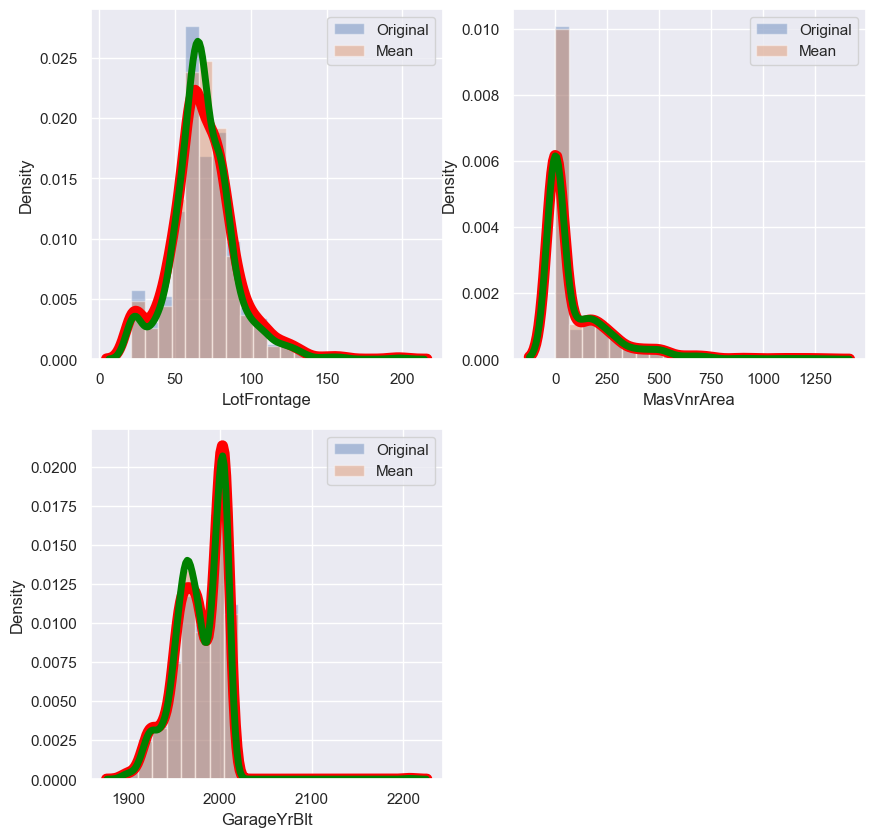

In [22]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(num_vars_miss):
    plt.subplot(2,2,i+1)
    sns.distplot(df[var], bins=20, kde_kws={'linewidth':8, 'color':'red'}, label="Original",)
    sns.distplot(df_copy[var], bins=20, kde_kws={'linewidth':5, 'color':'green'},label="Mean",)
    plt.legend()

# Median

In [23]:
df_copy_median = df.copy()
num_vars_miss = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
cat_vars = ['LotConfig','Exterior2nd','KitchenQual']
for cat_var, num_var_miss in zip(cat_vars,num_vars_miss):
    for var_class in df[cat_var].unique():
        df_copy_median.update(df[df.loc[:,cat_var] == var_class][num_var_miss].replace(np.nan,df[df.loc[:,cat_var] == var_class][num_var_miss].median()))

In [24]:
df_copy_median[num_vars_miss].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_21016\1402343.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], bins=20, kde_kws={'linewidth':8, 'color':'red'}, label="Original")
C:\Users\lenovo\AppData\Local\Temp\ipykernel_21016\1402343.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

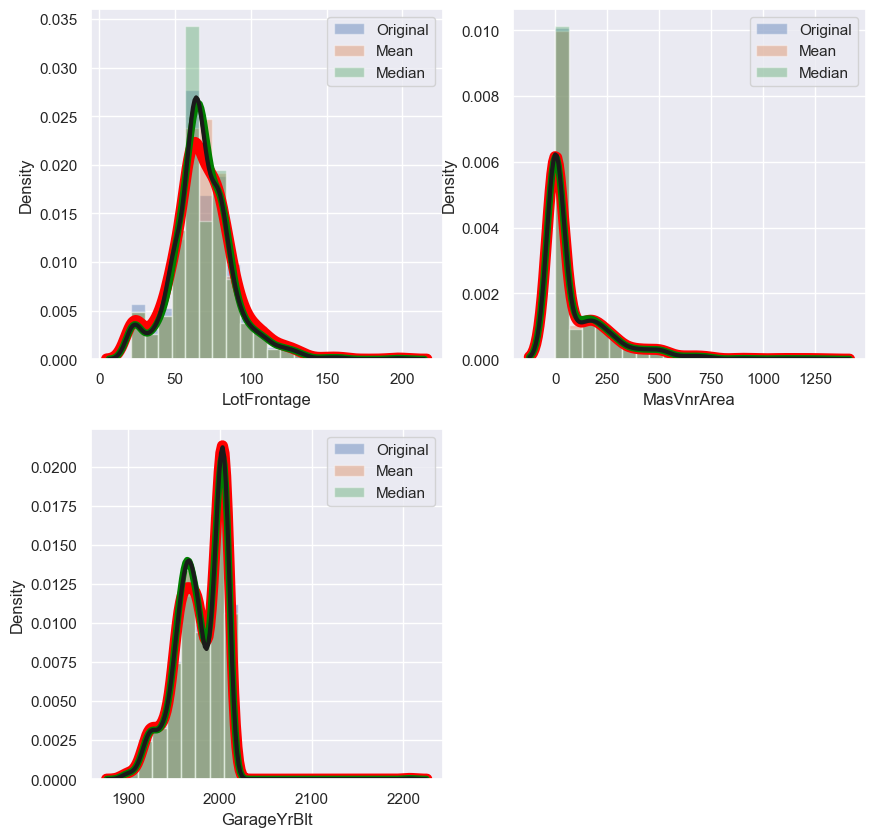

In [25]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(num_vars_miss):
    plt.subplot(2,2,i+1)
    sns.distplot(df[var], bins=20, kde_kws={'linewidth':8, 'color':'red'}, label="Original")
    sns.distplot(df_copy[var], bins=20, kde_kws={'linewidth':5, 'color':'green'},label="Mean")
    sns.distplot(df_copy_median[var], bins=20, kde_kws={'linewidth':3, 'color':'k'},label="Median")
    plt.legend()

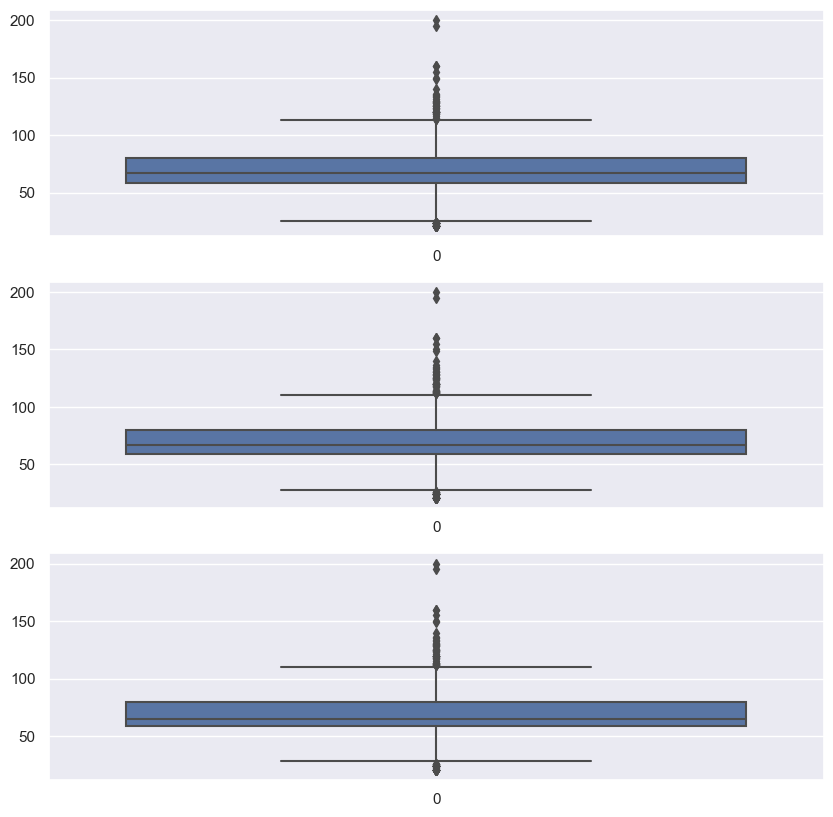

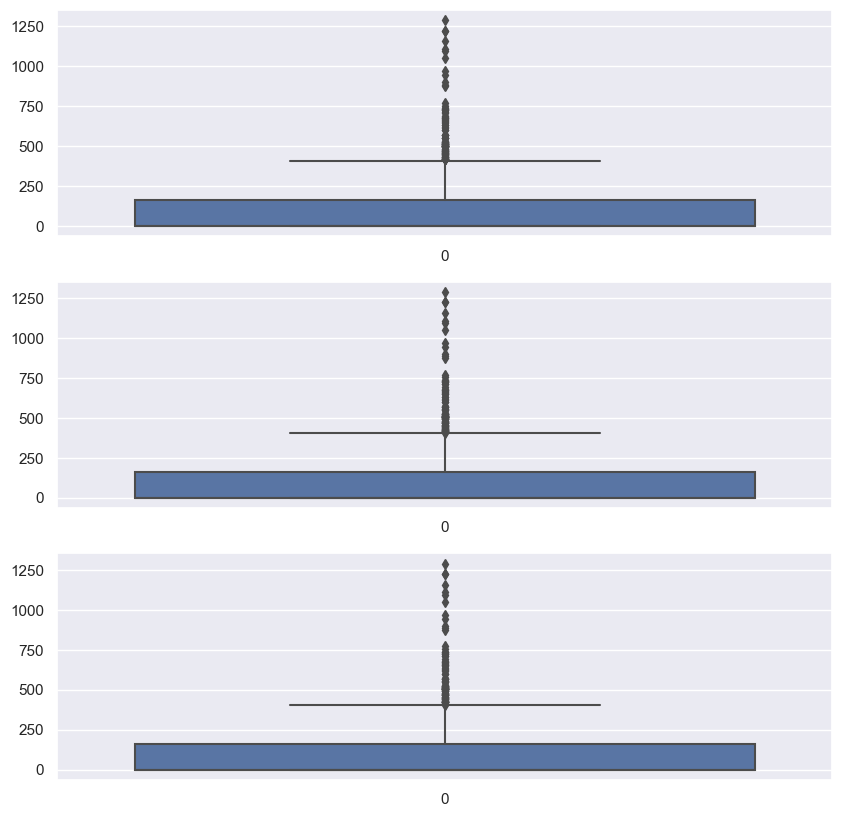

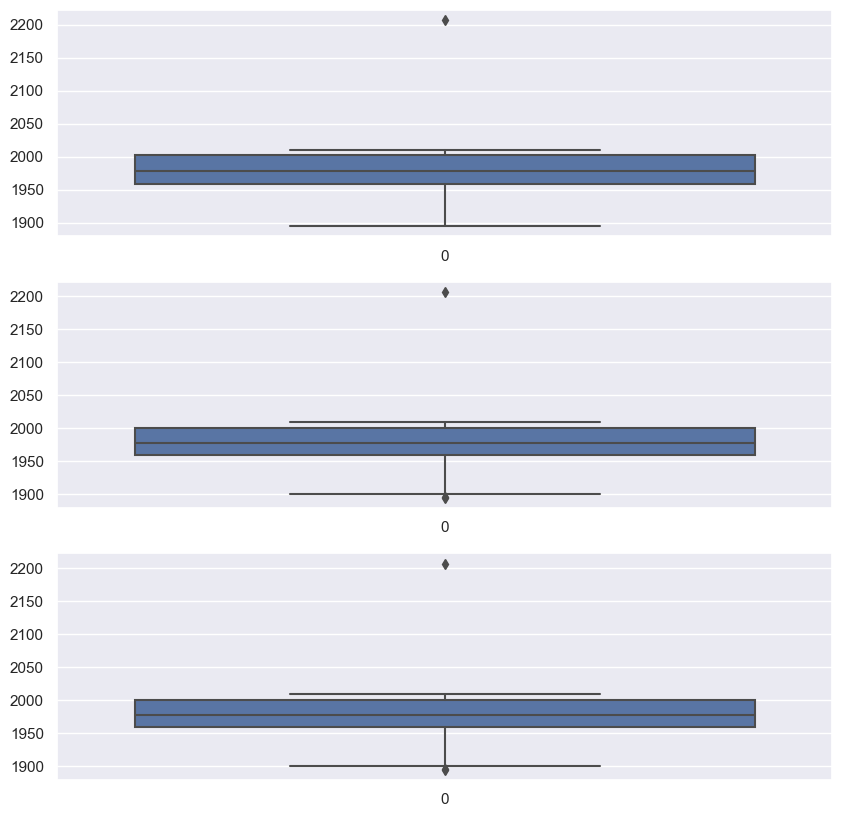

In [26]:
for i, var in enumerate(num_vars_miss):
    plt.figure(figsize=(10,10))
    plt.subplot(3,1,1)
    sns.boxplot(df[var])
    plt.subplot(3,1,2)
    sns.boxplot(df_copy[var])
    plt.subplot(3,1,3)
    sns.boxplot(df_copy_median[var])